참고 사이트 : https://www.vgchartz.com/games/games.php?name=Duck+Hunt&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=50&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&showvgchartzscore=1&shownasales=0&showdeveloper=0&showcriticscore=0&showcriticscore=1&showpalsales=0&showreleasedate=0&showreleasedate=1&showuserscore=0&showuserscore=1&showjapansales=0&showlastupdate=0&showlastupdate=1&showothersales=0&showshipped=0&showshipped=1

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

C:\Users\pc\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Data Preprocessing

In [2]:
# Data Load
df = pd.read_csv('vgames2.csv',index_col=0)

# df.info()
# df.isnull().sum() # Null값 확인 후 제거
# Drop NA value
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)
# df[df.duplicated(keep = False)] # 중복값 확인
df['Year'] = df['Year'].astype('int') # data type (float to int)
# Sales Data type (str to float)
'''기본 단위는 M이며, K 단위의 경우 문자 제거 후 스케일링'''
for i in df.columns[-4:]:
    K_index = df[df[i].str.contains('K')].index
    splited = [float (re.split('[A-Z]', j)[0]) for j in df[i]]
    for k in K_index :
        splited[k] /= 1000
    df[i] = splited

# Year value error
'''1980이하 값, 0~23 => 2000년도로 수정 / 80~99 => 1900년도로 수정'''
def year_sorting(x):
    if x<=23: 
        x+=2000
    elif x<100: 
        x+=1900
    else : 
        x+=0
    return x
df['Year'] = df['Year'].apply(lambda x : year_sorting(x))

# Duplicate value
'''동일한 이름, 플랫폼, 연도이지만 판매량이 다른 데이터의 경후 합산 처리'''
# df[df.duplicated(subset = ['Name','Platform','Year'],keep = False)].sort_values(by=['Name'])
df.iloc[7199,-4:] = df[df.duplicated(subset = ['Name','Platform','Year'],keep = False)].sort_values(by=['Name']).iloc[:,-4:].sum()
df.drop(index=8543, inplace = True)
df.reset_index(drop=True, inplace=True)

# Company column
'''다양한 플랫폼을 모두 시각화하기는 어려움이 있다고 판단하여 회사명으로 column 통합'''
Xbox = ['XB','XOne','X360']
Nintendo = ['GC','N64','DS','3DS','Wii','WiiU','NES','SNES','GBA','GB']
PlayStation = ['PS','PS2','PS3','PS4','PSP','PSV']
Sega = ['GEN','SCD','SAT','GG','DC']
Others = ['2600','WS','TG16','PCFX','3DO','PC']

def game_company(x):
    if x in Xbox : return 'Xbox'
    elif x in Nintendo : return 'Nintendo'
    elif x in PlayStation : return 'PlayStation'
    elif x in Sega : return 'Sega'
    else : return 'Others'
df['Company'] = df['Platform'].apply(lambda x : game_company(x))



## Platform 종류
#### Xbox Series

- XB : Xbox
- XOne : Xbox One
- X360 : Xbox 360

#### Nintendo Series

- GC : GameCube
- N64 : Nintendo 64
- DS : Nintendo DS
- 3DS : Nintendo 3DS
- Wii : Nintendo Wii
- WiiU : Nintendo Wii U
- NES : Nintendo Entertainment System
- SNES : Super Nintendo Entertainment System
- GBA : Game Boy Advance
- GB : Gambe Boy

#### PlayStation Series

- PS : PlayStation
- PS2 : PlayStation 2
- PS3 : PlayStation 3
- PS4 : PlayStation 4
- PSP : PlayStation Portable
- PSV : PlayStation Vita

#### Sega Series

- GEN : Sega Genesis
- SCD : Sega CD
- SAT : Sega Saturn
- GG : GameGear
- DC : Dreamcast

#### Others
- 2600 : Atari 2600
- WS : WonderSwan
- TG16 : TurboGrafx-16
- PCFX : PC-FX
- 3DO : 3DO Interactive Multiplayer
- PC : Desktop



### 동일한 게임, 플랫폼이지만 연도가 다른 것은 재출시 또는 리뉴얼 버전으로 판단

In [9]:
df[df.duplicated(subset=['Name','Platform'],keep=False)]

Name Platform  Year   Genre        Publisher  \
1298   Need for Speed: Most Wanted     X360  2012  Racing  Electronic Arts   
2621   Need for Speed: Most Wanted       PC  2005  Racing  Electronic Arts   
12267  Need for Speed: Most Wanted     X360  2005  Racing  Electronic Arts   
13513  Need for Speed: Most Wanted       PC  2012  Racing  Electronic Arts   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales Company  
1298       0.62      0.80      0.01         0.15    Xbox  
2621       0.02      0.23      0.00         0.05  Others  
12267      1.00      0.17      0.02         0.10    Xbox  
13513      0.00      0.06      0.00         0.02  Others

### 동일한 이름의 게임임에도 Publisher가 다른 경우가 있음.
#### 가능한 경우의 수 :
- 1. 동일한 이름의 게임이지만 다른 게임인 경우
- 2. 회사명이 바뀐 경우
- 3. 타 회사가 판권을 가지는 경우 등  
`따라서 Publisher가 Unknown인 경우를 채우기 위한 작업은 진행하지 않았음.`

In [11]:
UK_PB_list = df[df['Publisher'] == 'Unknown']['Name'].unique()

In [12]:
df[df['Name'] == UK_PB_list[53]]

Name Platform  Year   Genre  \
71     Teenage Mutant Ninja Turtles       XB  2003  Action   
791    Teenage Mutant Ninja Turtles      NES  1989  Action   
7159   Teenage Mutant Ninja Turtles       GC  2003  Action   
8660   Teenage Mutant Ninja Turtles      GBA  2003  Action   
13189  Teenage Mutant Ninja Turtles      PS2  2003  Action   
14534  Teenage Mutant Ninja Turtles      Wii  2007  Action   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
71     Konami Digital Entertainment      0.22      0.06      0.00   
791                          Palcom      3.38      0.44      0.31   
7159   Konami Digital Entertainment      0.26      0.07      0.00   
8660                        Unknown      0.67      0.25      0.00   
13189  Konami Digital Entertainment      0.45      0.35      0.00   
14534  Konami Digital Entertainment      0.00      0.01      0.00   

       Other_Sales      Company  
71            0.01         Xbox  
791           0.04     Nintendo  
7159          0.01     Nintendo  
8660          0.02     Nintendo  
13189         0.12  PlayStation  
14534         0.00     Nintendo

# 반드시 들어가야 하는 내용 (Mission)
앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1.`지역에 따라서 선호하는 게임 장르가 다를까` 라는 질문에 대답을 하셔야합니다.
- 지역은 어떻게 구분했나요?
- 지역별로 선호하는 게임의 장르를 파악했나요?
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?    

2.`연도별 게임의 트렌드가 있을까` 라는 질문에 대답을 하셔야합니다.
- 트렌드는 어떤 것을 기준으로 파악했나요?
- 연도별로 트렌드가 존재하나요?
- 왜 존재한다/존재하지 않는다고 생각했나요?  

3.`인기가 많은 게임에 대한 분석 및 시각화 프로세스`가 포함되어야 합니다.
- 인기가 많다는 것을 어떻게 정의했나요?
- 해당 게임이 왜 인기가 많다고 생각했나요?
- 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
- 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?  

4.`다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론`이 제시되어야 합니다.

더불어 유의미한 인사이트를 도출하기 위해서는
- `다음 분기`가 언제인지
- `회사의 규모`는 어느정도인지
와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.  

위의 4가지 내용에 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

# 1번
1.`지역에 따라서 선호하는 게임 장르가 다를까` 라는 질문에 대답을 하셔야합니다.
- 지역은 어떻게 구분했나요?
- 지역별로 선호하는 게임의 장르를 파악했나요?
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?    

In [13]:
Genre_location = df.groupby('Genre').sum().iloc[:,1:]
Genre_location

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          858.75    513.64    156.60       183.99
Adventure       101.79     63.66     51.87        16.70
Fighting        220.35     99.90     87.14        36.15
Misc            394.73    208.15    104.18        72.64
Platform        445.38    200.63    130.53        51.45
Puzzle          121.58     50.47     56.24        12.44
Racing          354.70    235.02     56.32        76.51
Role-Playing    318.76    183.09    342.93        56.73
Shooter         574.48    310.23     38.18       101.86
Simulation      181.43    112.99     63.54        31.32
Sports          667.26    370.97    134.76       132.35
Strategy         67.83     44.82     49.10        11.23

In [14]:
Total = Genre_location.sum(axis=1)

## 지역 전체 장르 선호도

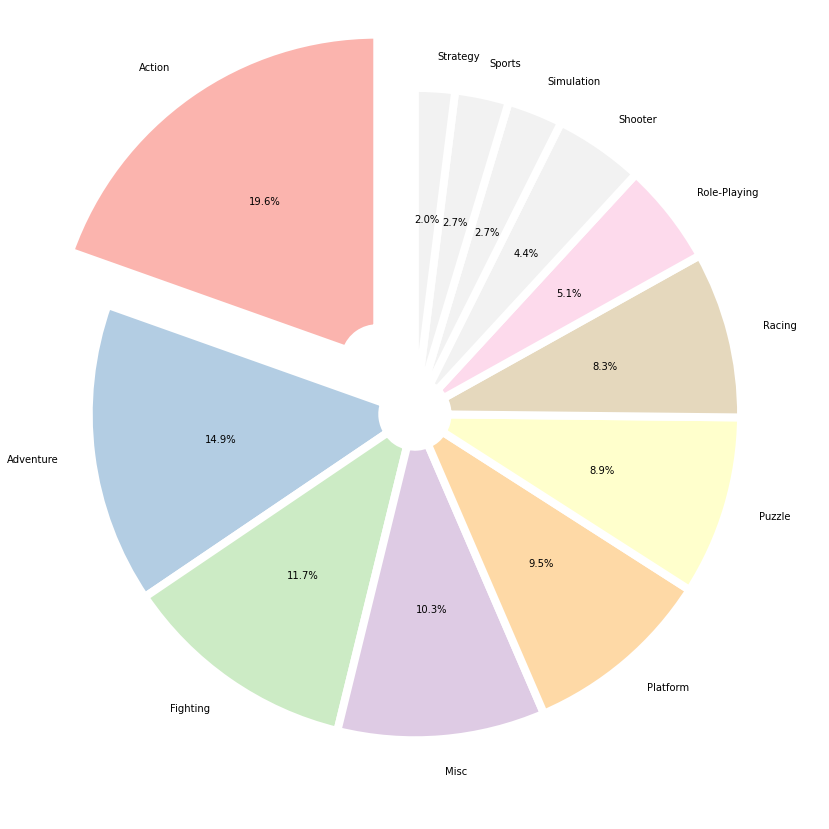

In [15]:
wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 8}
colors = plt.cm.Pastel1(range(len(Genre_location.index)))
explodes = (0.2,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(15,15))
plt.pie(Total.sort_values(ascending=False),labels = Genre_location.index,explode=explodes,autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=wedgeprops)
plt.show()

## Western vs Non-Western

In [16]:
Western_country = Genre_location[['NA_Sales','EU_Sales']].sum(axis=1)
Non_Western_country = Genre_location[['JP_Sales','Other_Sales']].sum(axis=1)

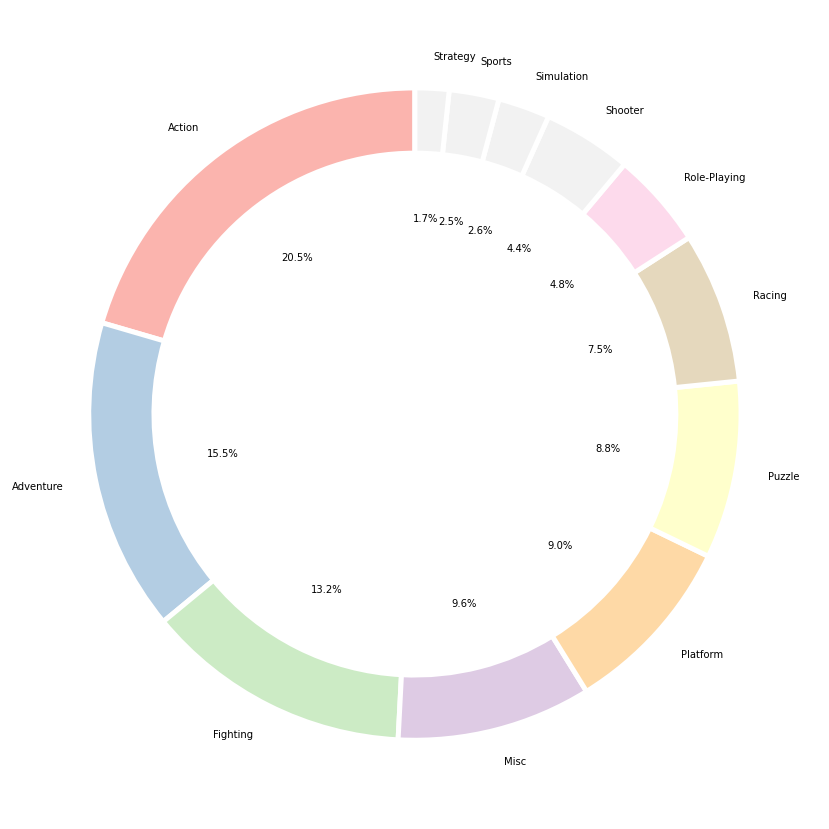

In [17]:
wedgeprops={'width': 0.2, 'edgecolor': 'w', 'linewidth': 5}
colors = plt.cm.Pastel1(range(len(Genre_location.index)))
explodes = (0,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(15,15))
plt.pie(Western_country.sort_values(ascending=False),labels = Genre_location.index,explode=explodes,autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=wedgeprops)
plt.show()

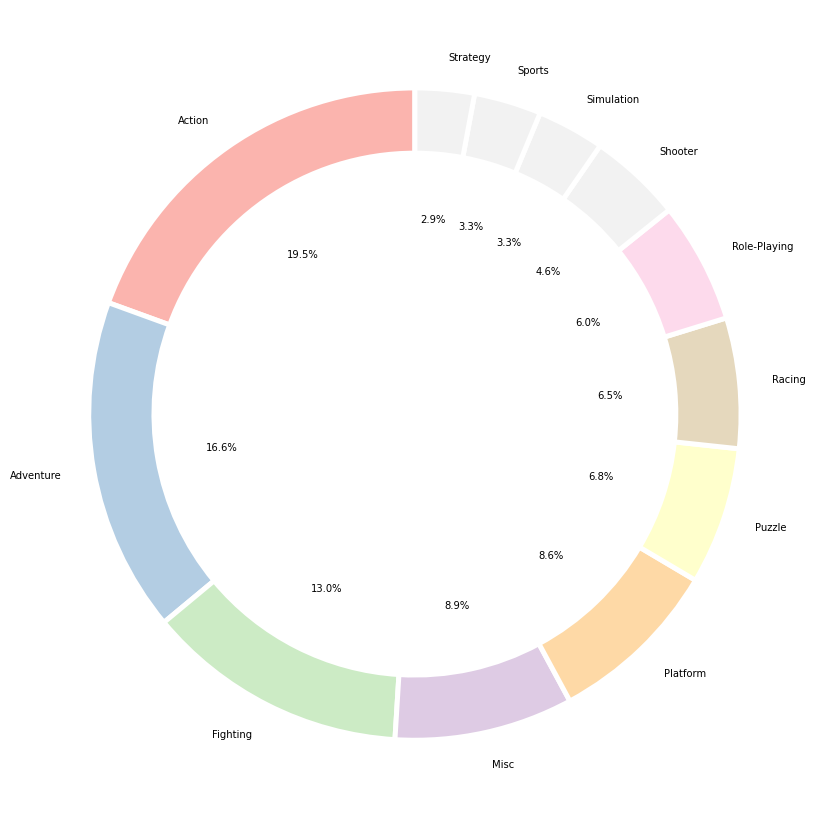

In [18]:
wedgeprops={'width': 0.2, 'edgecolor': 'w', 'linewidth': 5}
colors = plt.cm.Pastel1(range(len(Genre_location.index)))
explodes = (0,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(15,15))
plt.pie(Non_Western_country.sort_values(ascending=False),labels = Genre_location.index,explode=explodes,autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=wedgeprops)
plt.show()

## 네 지역 장르 선호도
#### 선호도 1위를 제외한 나머지는 파란색 표시

In [19]:
def get_color_code(x):
    colors = []
    for i in range(len(Genre_location.index)):
        if Genre_location[x].argmax() == i:
            colors.append('r')
        else :
            colors.append('b')
    return colors

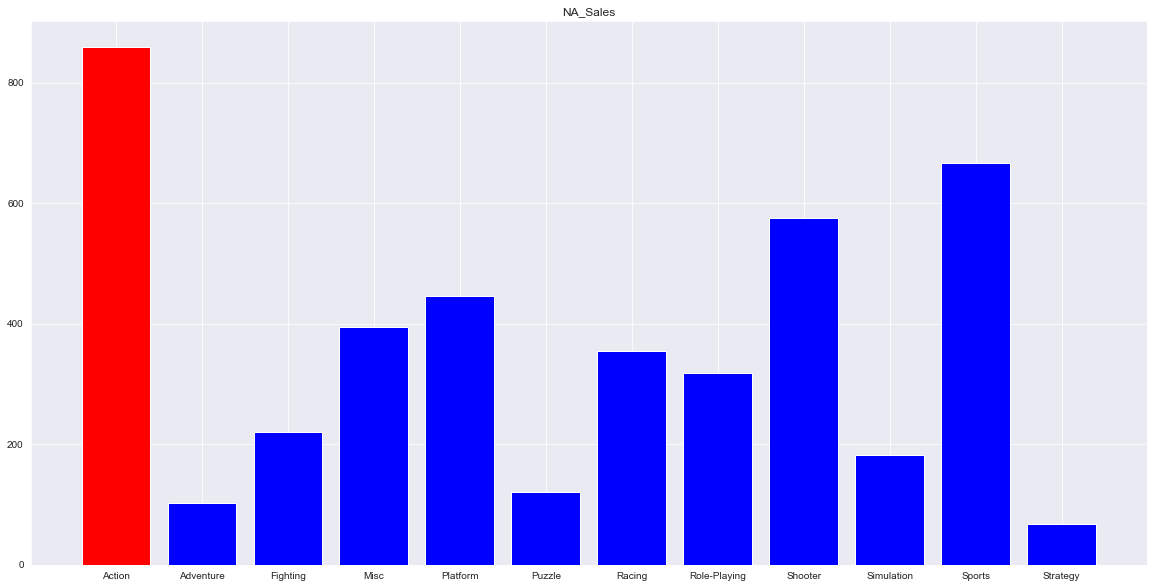

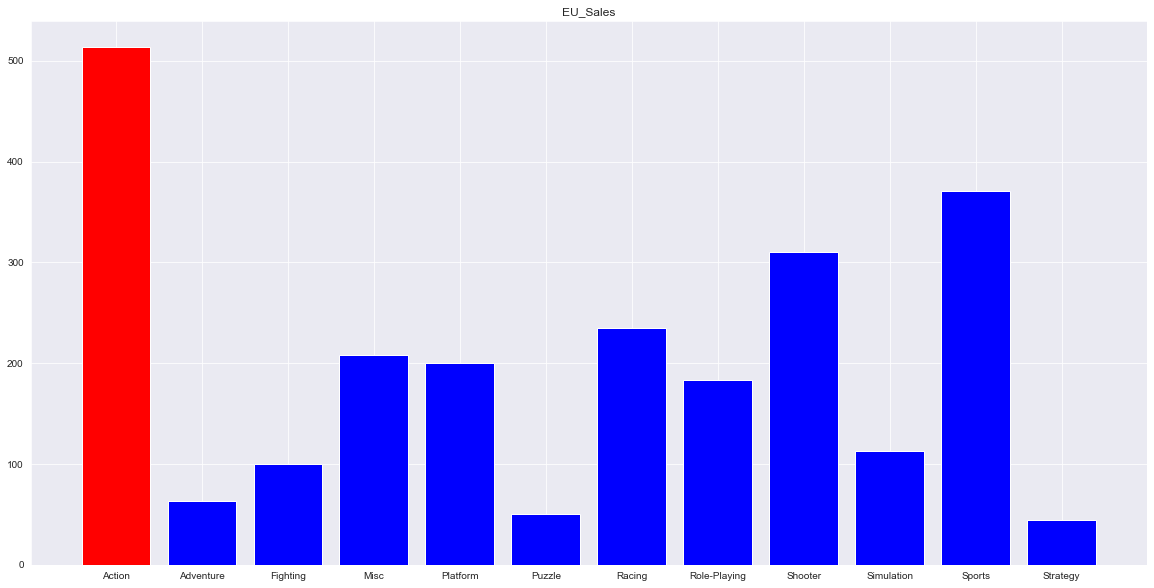

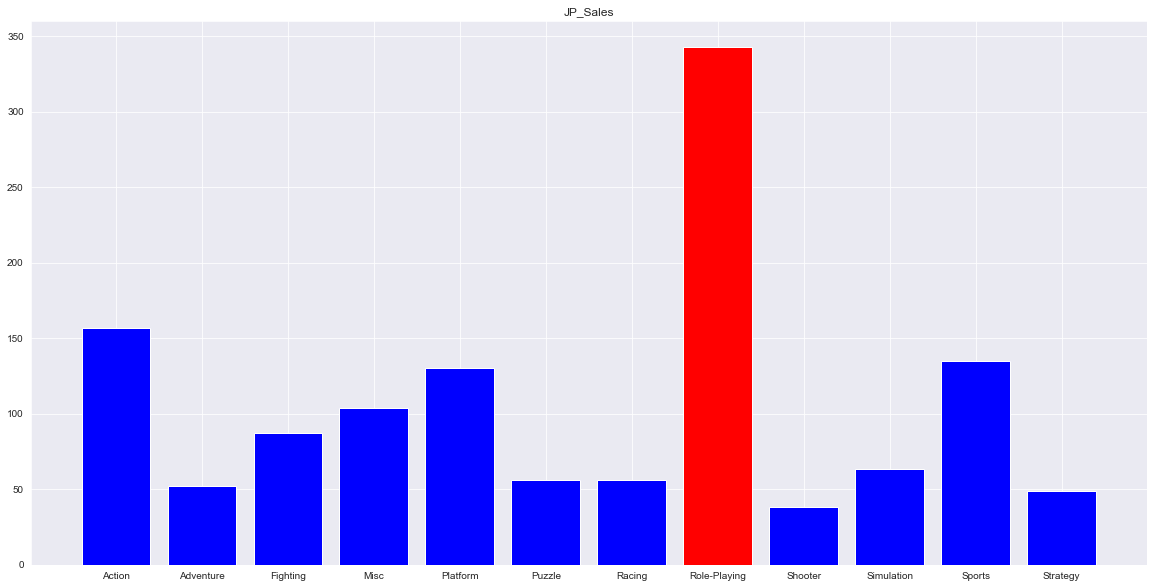

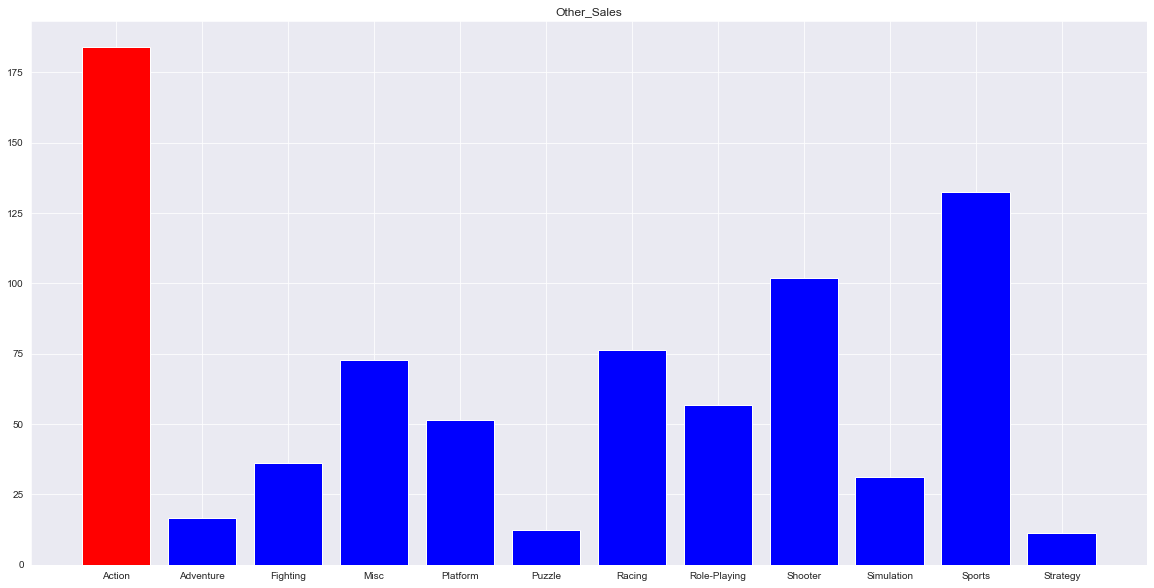

In [20]:
for country in Genre_location.columns:
    plt.figure(figsize=(20,10))
    sns.set_style('darkgrid')
    sns.set_palette('Paired')
    plt.bar(Genre_location.index, Genre_location[country], color = get_color_code(country))
    plt.xticks(np.arange(12), Genre_location.index)
    plt.title(country)
    plt.show()

### 지역별 판매량 Top-5 정보

In [21]:
df.sort_values(ascending = False, by =['NA_Sales'] )[['Name','Genre','NA_Sales']].head()

Name     Genre  NA_Sales
2855          Wii Sports    Sports     41.49
4113   Super Mario Bros.  Platform     29.08
10279          Duck Hunt   Shooter     26.93
1187              Tetris    Puzzle     23.20
12315     Mario Kart Wii    Racing     15.85

In [23]:
df.sort_values(ascending = False, by =['EU_Sales'] )[['Name','Genre','EU_Sales']].head()

Name       Genre  EU_Sales
2855           Wii Sports      Sports     29.02
12315      Mario Kart Wii      Racing     12.88
3288    Wii Sports Resort      Sports     11.01
10913          Nintendogs  Simulation     11.00
3414   Grand Theft Auto V      Action      9.27

In [25]:
df.sort_values(ascending = False, by =['JP_Sales'] )[['Name','Genre','JP_Sales']].head()

Name         Genre  JP_Sales
7673        Pokemon Red/Pokemon Blue  Role-Playing     10.22
9232     Pokemon Gold/Pokemon Silver  Role-Playing      7.20
4113               Super Mario Bros.      Platform      6.81
6796           New Super Mario Bros.      Platform      6.50
10344  Pokemon Diamond/Pokemon Pearl  Role-Playing      6.04

In [27]:
df.sort_values(ascending = False, by =['Other_Sales'] )[['Name','Genre','Other_Sales']].head()

Name   Genre  Other_Sales
14354  Grand Theft Auto: San Andreas  Action        10.57
2855                      Wii Sports  Sports         8.46
14350                 Gran Turismo 4  Racing         7.53
3414              Grand Theft Auto V  Action         4.14
12315                 Mario Kart Wii  Racing         3.31

## 추가 고려사항
- 각 게임 장르 출시 개수를 고려할 필요가 있음  
    Action 장르가 1000개가 출시될 때 Sports 장르가 1개만 출시된다면 상대적으로 Action 장르의 판매량이 높을 가능성이 크기 때문

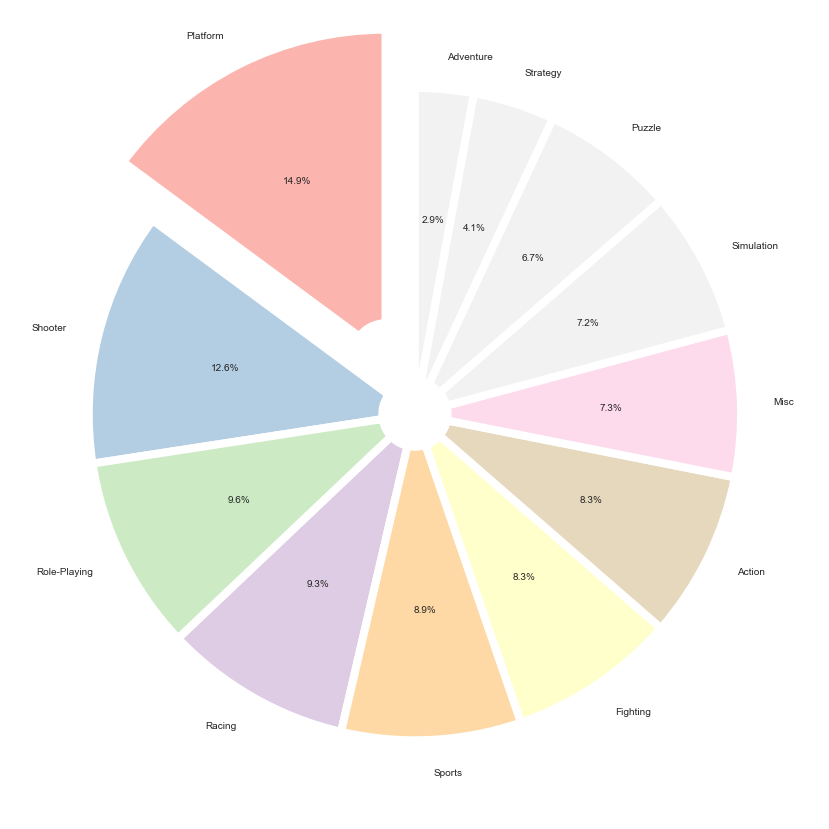

In [29]:
wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 8}
colors = plt.cm.Pastel1(range(len(Genre_location.index)))
explodes = (0.2,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(15,15))
plt.pie((Total / df['Genre'].value_counts()).sort_values(ascending=False),labels = (Total / df['Genre'].value_counts()).sort_values(ascending=False).index,explode=explodes,autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=wedgeprops)
plt.show()

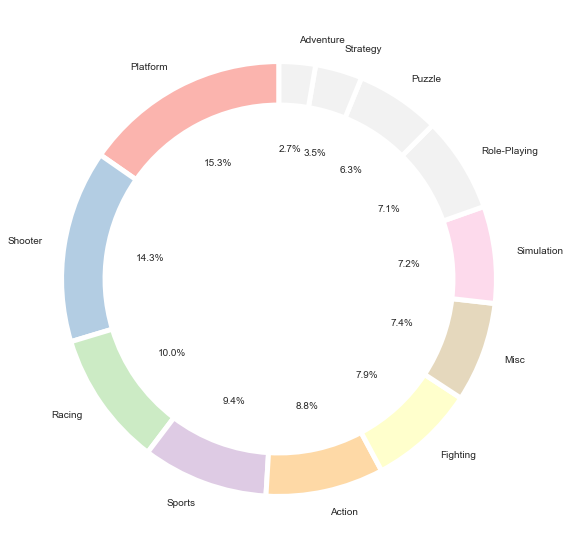

In [30]:
wedgeprops={'width': 0.2, 'edgecolor': 'w', 'linewidth': 5}
colors = plt.cm.Pastel1(range(len(Genre_location.index)))
explodes = (0,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(10,10))
plt.pie((Western_country / df['Genre'].value_counts()).sort_values(ascending=False),labels = (Western_country / df['Genre'].value_counts()).sort_values(ascending=False).index,explode=explodes,autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=wedgeprops)
plt.show()

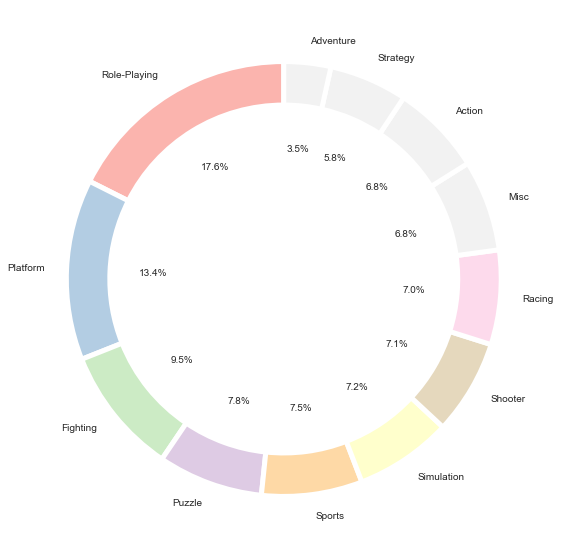

In [31]:
wedgeprops={'width': 0.2, 'edgecolor': 'w', 'linewidth': 5}
colors = plt.cm.Pastel1(range(len(Genre_location.index)))
explodes = (0,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(10,10))
plt.pie((Non_Western_country / df['Genre'].value_counts()).sort_values(ascending=False),labels = (Non_Western_country / df['Genre'].value_counts()).sort_values(ascending=False).index,explode=explodes,autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=wedgeprops)
plt.show()

In [32]:
def get_color_code1(x):
    colors = []
    for i in range(len(Genre_location.index)):
        if (Genre_location[x]/df['Genre'].value_counts()).argmax() == i:
            colors.append('r')
        else :
            colors.append('b')
    return colors

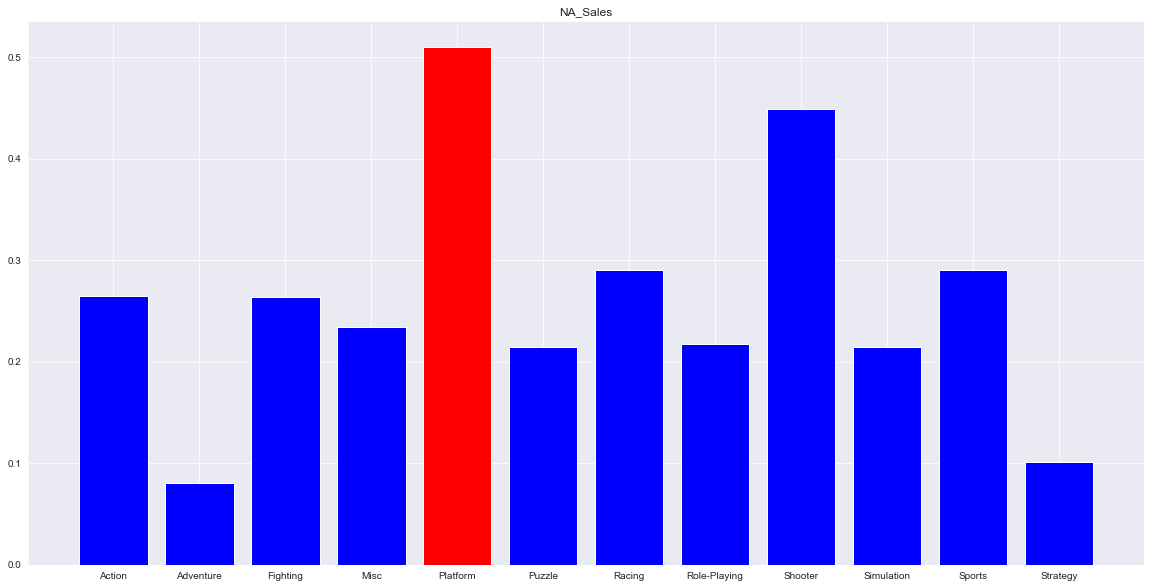

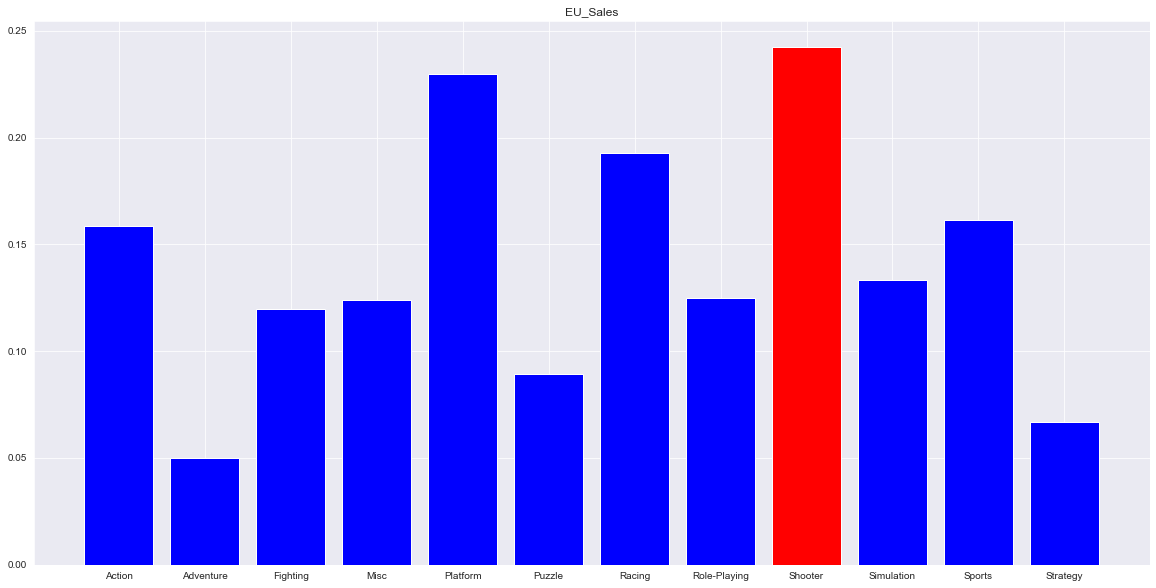

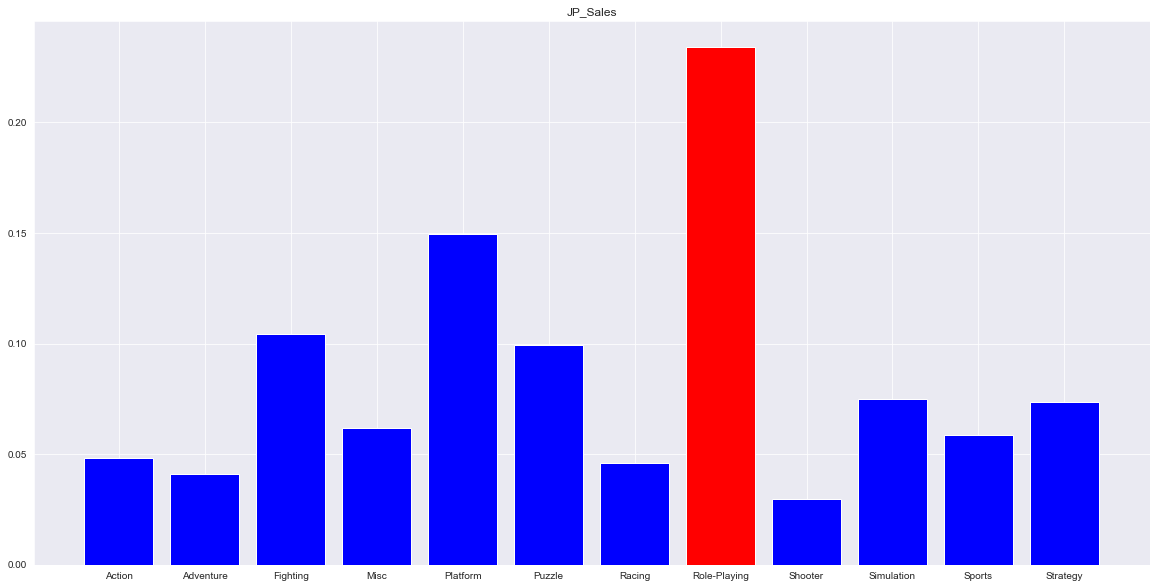

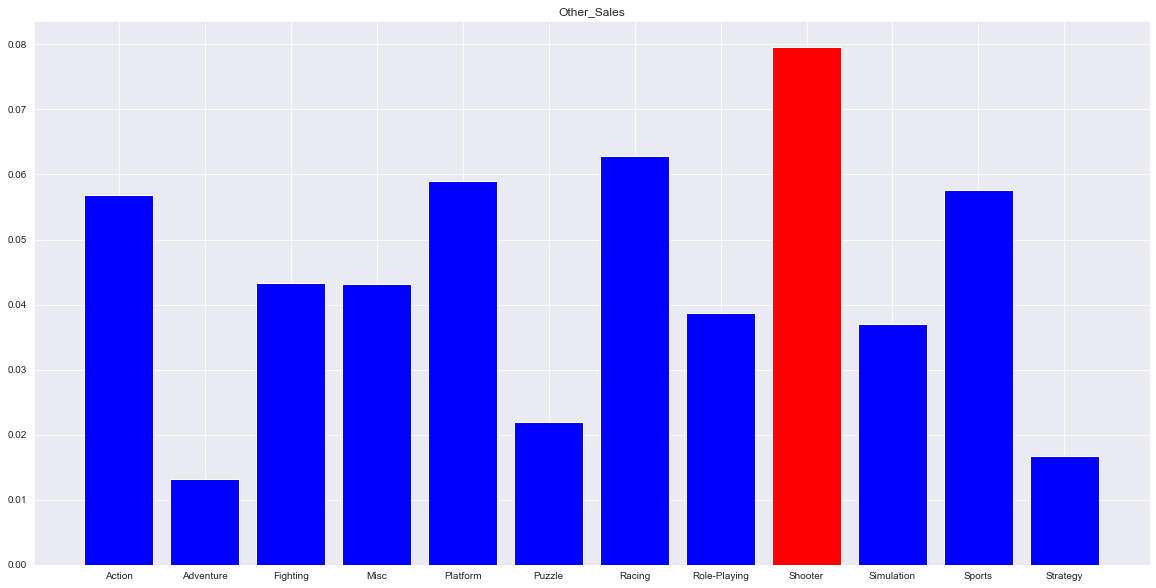

In [33]:
for country in Genre_location.columns:
    plt.figure(figsize=(20,10))
    sns.set_style('darkgrid')
    sns.set_palette('Paired')
    plt.bar(Genre_location.index, Genre_location[country]/df['Genre'].value_counts(), color = get_color_code1(country))
    plt.xticks(np.arange(12), Genre_location.index)
    plt.title(country)
    plt.show()

# 2번
2.`연도별 게임의 트렌드가 있을까` 라는 질문에 대답을 하셔야합니다.
- 트렌드는 어떤 것을 기준으로 파악했나요?
- 연도별로 트렌드가 존재하나요?
- 왜 존재한다/존재하지 않는다고 생각했나요?  

In [35]:
# Platform 종류
df.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [36]:
# Platform 갯수
len(df.Platform.unique())

31

플랫폼 종류가 많기 때문에 파악하기 쉽게 시각화하는 것이 어려우므로 회사 단위로 통합(5가지)
(DS, Wii -> Nintendo Series)
- 플랫폼 트렌드
- 플랫폼 회사의 트렌드(출시 수량)연도별 게임 장르 변화

In [106]:
Platform_var = df.groupby(['Platform','Year'],as_index=False).count().iloc[:,:3]
Platform_var.rename(columns = {'Name' : "Count"}, inplace = True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

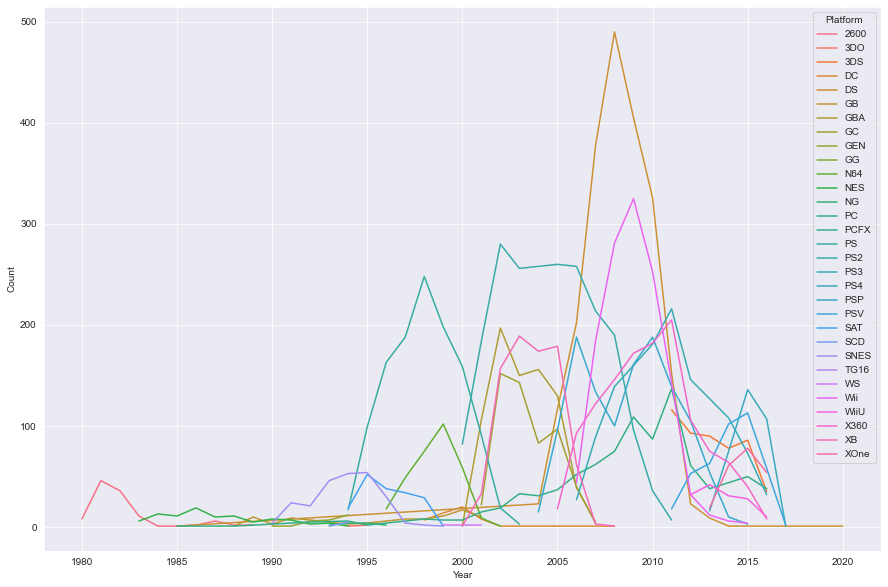

In [38]:
# 다양한 플랫폼 전부를 확인하기 쉽게 시각화하기는 어려움이 있음
# 플랫폼이 아닌 회사 별 시각화 진행
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='Count', hue='Platform', data=Platform_var )

In [107]:
Company_var = df.groupby(['Company','Year'],as_index=False).count().iloc[:,:3]
Company_var.rename(columns = {'Name' : "Count"}, inplace = True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

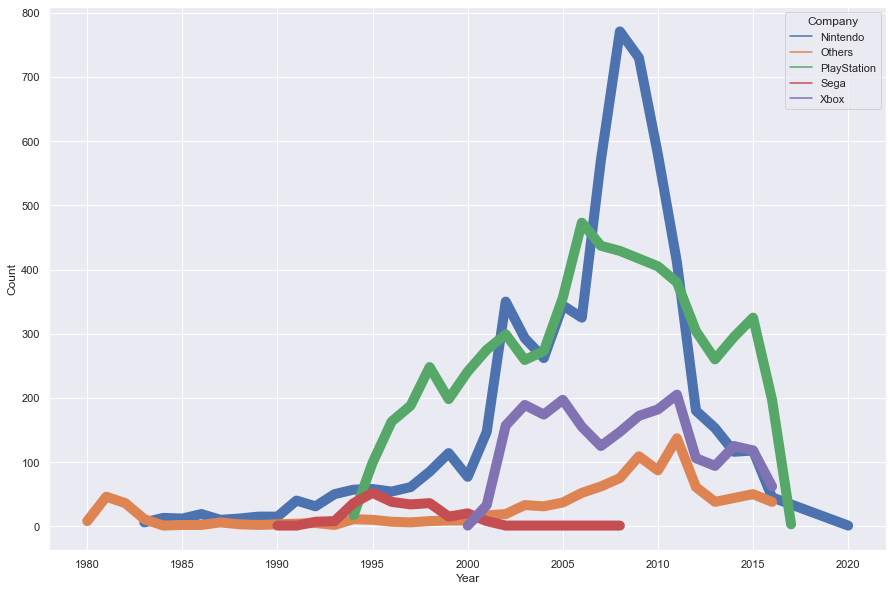

In [40]:
# 연도별 트렌드 파악
sns.set(color_codes=True)
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='Count', hue='Company', data=Company_var, linewidth=10 )

In [41]:
# 10년 / 5년 단위 시각화 시도
Company_var['5years'] = Company_var['Year']//5*5
Company_var['10years'] = Company_var['Year']//10*10

In [43]:
Platform_5years_trend = Company_var.groupby(['Company','5years'],as_index=False).sum()[['Company','5years','Count']]
Platform_10years_trend = Company_var.groupby(['Company','10years'],as_index=False).sum()[['Company','10years','Count']]

<AxesSubplot:xlabel='5years', ylabel='Count'>

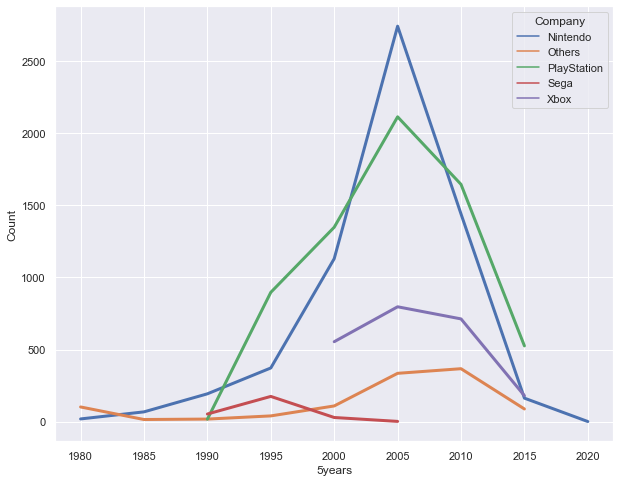

In [45]:
plt.figure(figsize=(10,8))
sns.lineplot(x='5years', y='Count', hue='Company', data=Platform_5years_trend, linewidth=3 )

<AxesSubplot:xlabel='10years', ylabel='Count'>

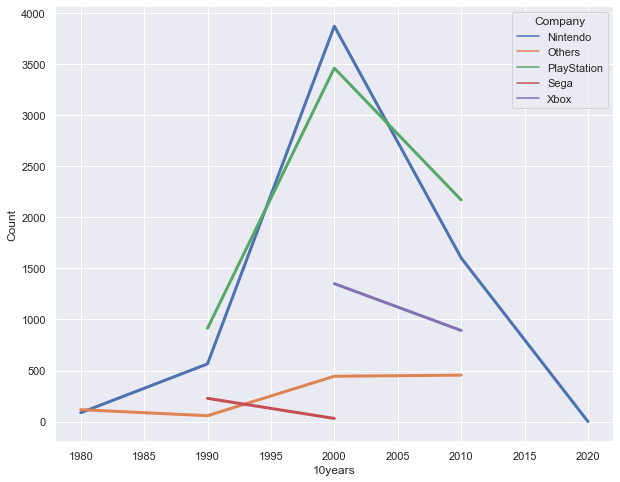

In [46]:
# 10년 주기 트렌드 (깔끔하지 않아 주석 처리)
# plt.figure(figsize=(10,8))
# sns.lineplot(x='10years', y='Count', hue='Company', data=Platform_10years_trend, linewidth=3 )

In [47]:
# 5년 주기로 봤을 때 게임 발매 수는 기타 게임사 -> Nintendo -> PlayStation -> Nintendo -> PlayStation -> Nintendo 순서로,
# Nintendo와 PlayStation 2강 구도임을 확인할 수 있었다.
# 판매량으로 플랫폼을 비교 해보자
df['Total'] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df['5_years'] = df['Year']//5*5
df['10_years'] = df['Year']//10*10

<AxesSubplot:xlabel='5_years', ylabel='Total'>

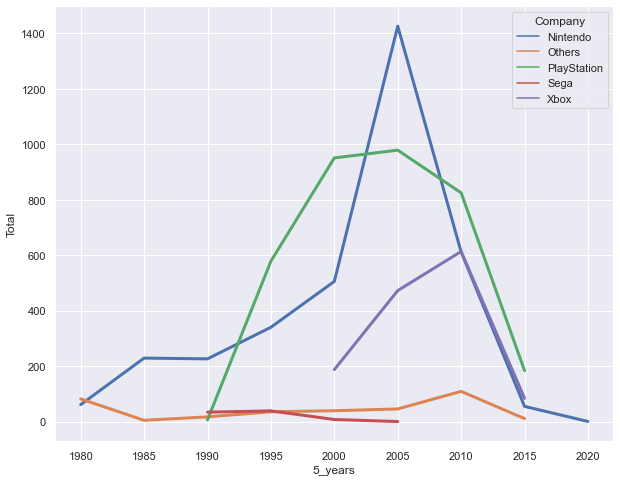

In [48]:
# 5년 주기로 봤을 때 게임 판매 수는 기타 게임사 -> Nintendo -> PlayStation -> Nintendo -> PlayStation -> Nintendo 순서로,
# 게임 발매 수량과 동일하게 Nintendo와 PlayStation 2강 구도임을 확인할 수 있었다.
Platform_5years_trend1 = df.groupby(['Company','5_years'],as_index=False).sum()[['Company','5_years','Total']]
plt.figure(figsize=(10,8))
sns.lineplot(x='5_years', y='Total', hue='Company', data=Platform_5years_trend1, linewidth=3 )

<AxesSubplot:xlabel='10_years', ylabel='Total'>

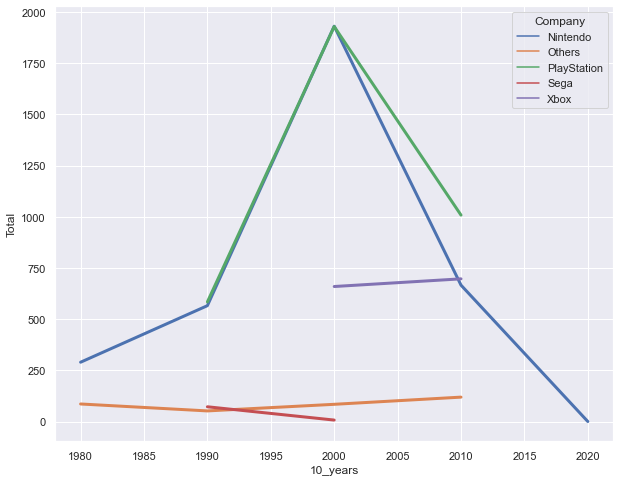

In [49]:
# 10년 주기 트렌드 (깔끔하지 않아 주석 처리)
# Platform_10years_trend1 = df.groupby(['Company','10_years'],as_index=False).sum()[['Company','10_years','Total']]
# plt.figure(figsize=(10,8))
# sns.lineplot(x='10_years', y='Total', hue='Company', data=Platform_10years_trend1, linewidth=3 )

<AxesSubplot:xlabel='Year', ylabel='Count'>

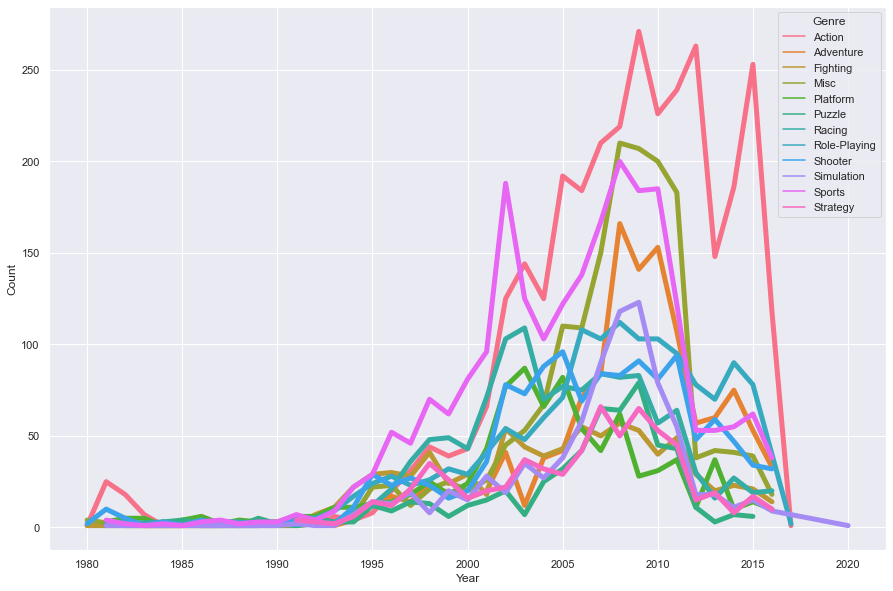

In [50]:
# 플랫폼 트렌드를 알아보았으니 게임 장르 트렌드를 알아보자
Genre_var = df.groupby(['Genre','Year'],as_index=False).count().iloc[:,:3]
Genre_var.rename(columns = {'Name' : "Count"}, inplace = True)


# sns.set(color_codes=True)
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='Count', hue='Genre', data=Genre_var, linewidth=5 )

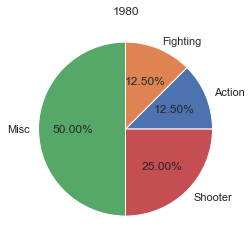

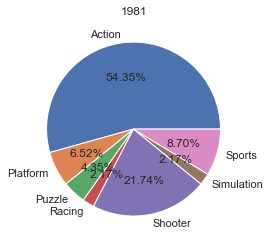

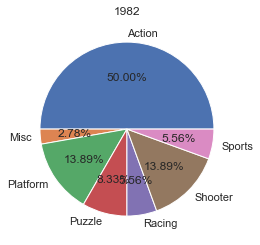

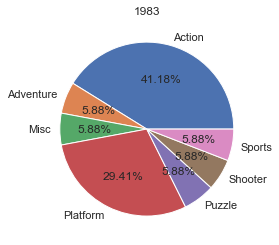

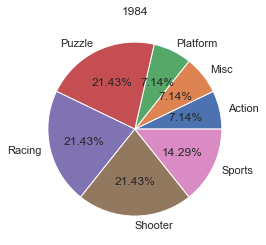

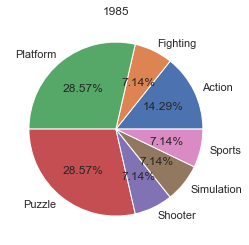

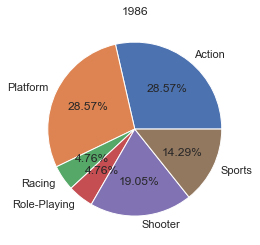

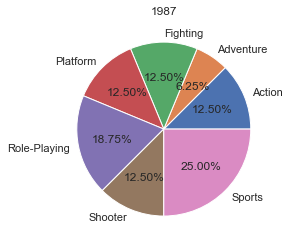

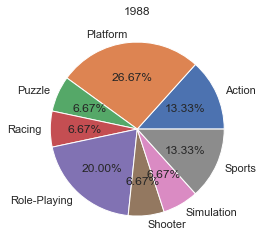

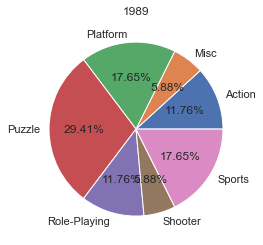

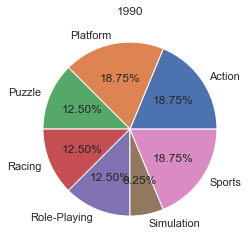

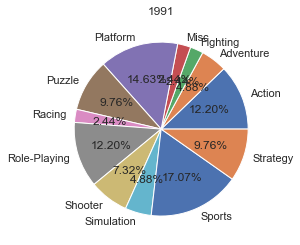

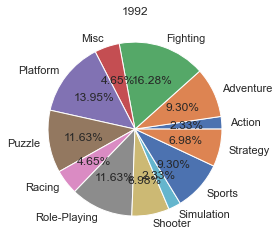

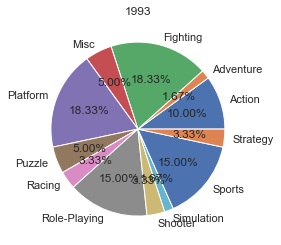

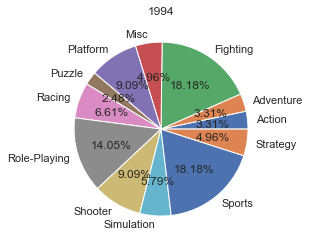

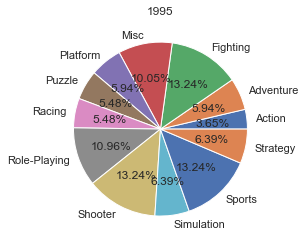

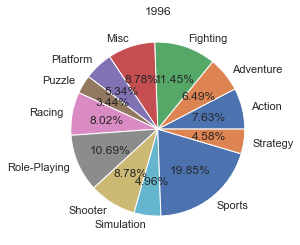

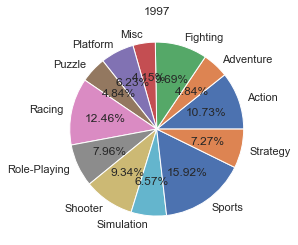

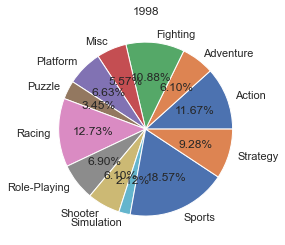

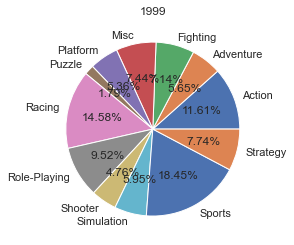

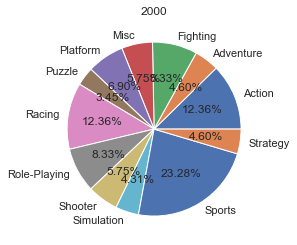

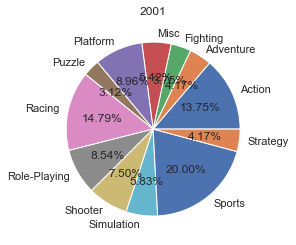

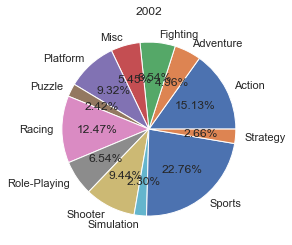

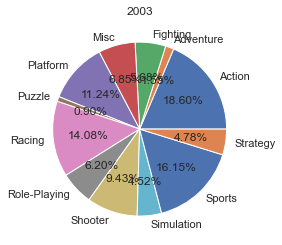

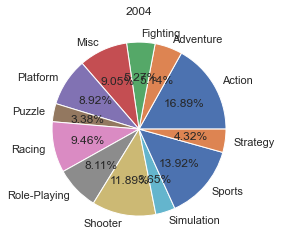

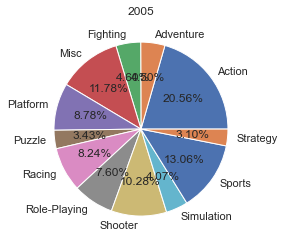

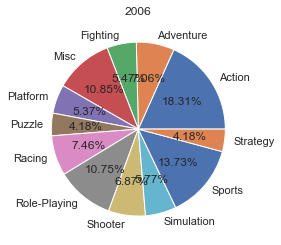

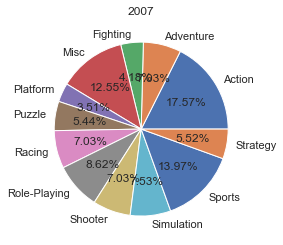

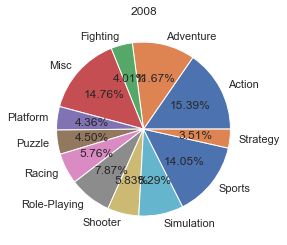

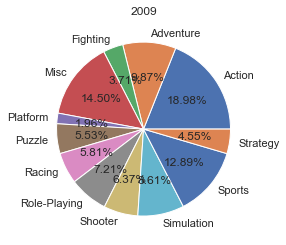

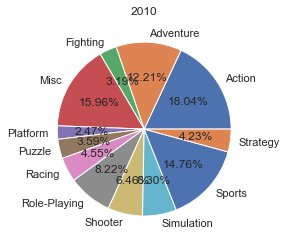

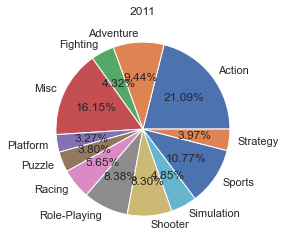

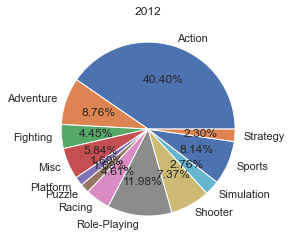

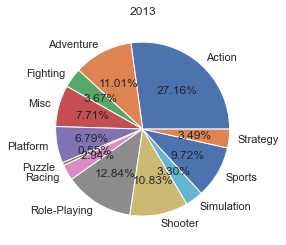

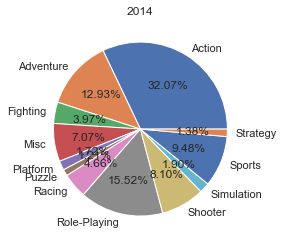

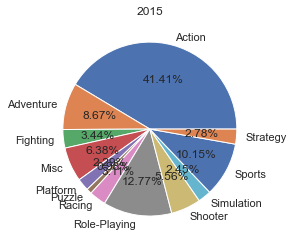

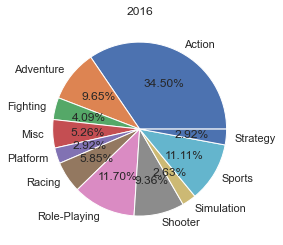

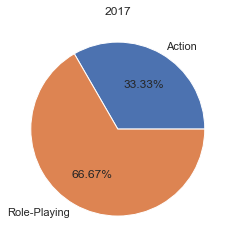

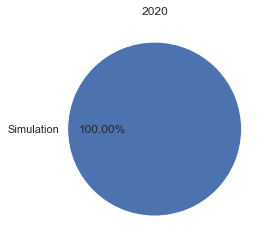

In [51]:
for i in set(df['Year']):
    dt = Genre_var[Genre_var['Year']==i]
    plt.pie(dt['Count'], labels=dt['Genre'], autopct='%.2f%%')
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='5_years', ylabel='Count'>

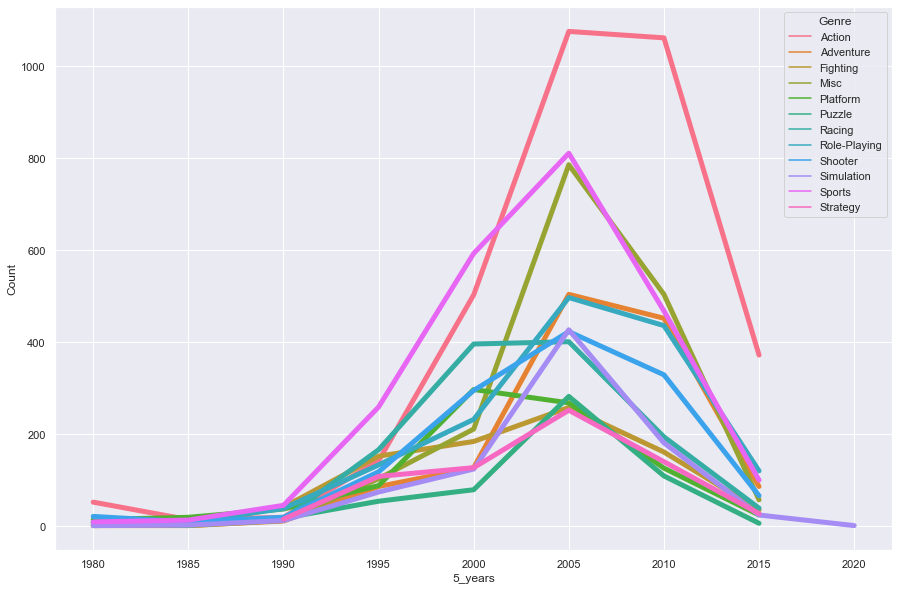

In [52]:
Genre_var = df.groupby(['Genre','5_years'],as_index=False).count().iloc[:,:3]
Genre_var.rename(columns = {'Name' : "Count"}, inplace = True)


# sns.set(color_codes=True)
plt.figure(figsize=(15,10))
sns.lineplot(x='5_years', y='Count', hue='Genre', data=Genre_var, linewidth=5 )

#### 게임사가 발매한 게임의 장르의 트렌드는 연도마다 달라진다.

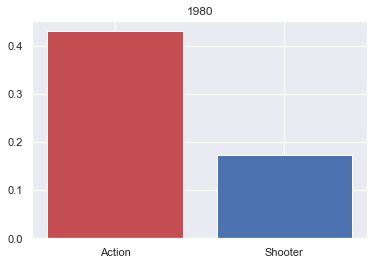

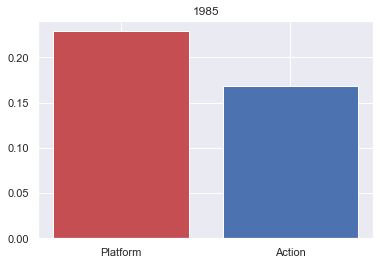

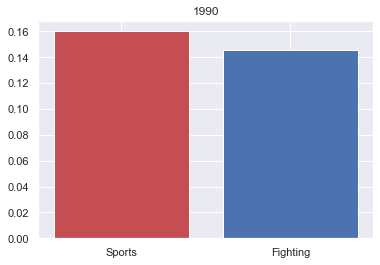

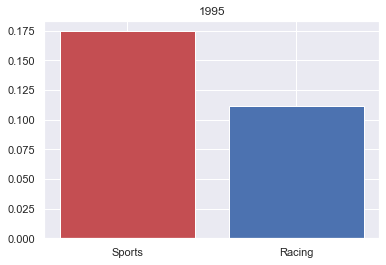

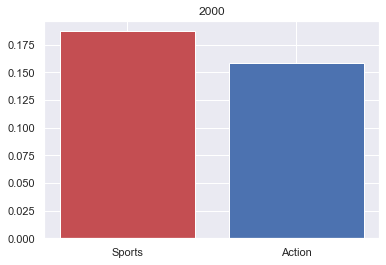

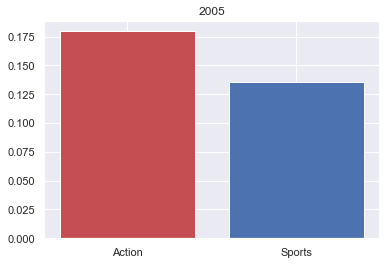

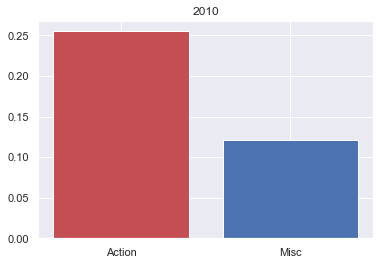

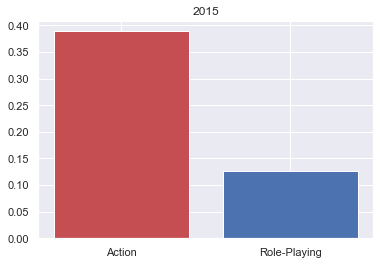

In [57]:
# 5년 주기 발매 트렌드는? Top2
for i in np.sort(df['5_years'].unique()[:-1]):
    dt = Genre_var[Genre_var['5_years']==i]
    ratio = dt['Count']/dt['Count'].sum()
    top2 = ratio.sort_values(ascending=False)[:2]
#     plt.pie(top2, labels=dt['Genre'][top2.index], autopct='%.2f%%')
    plt.bar(dt['Genre'][top2.index],top2, color = ['r','b'] )
    plt.xticks(np.arange(2), dt['Genre'][top2.index])
    plt.title(i)
    plt.show()

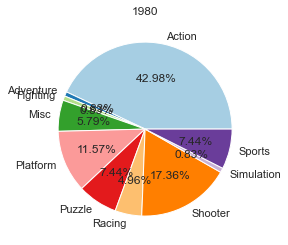

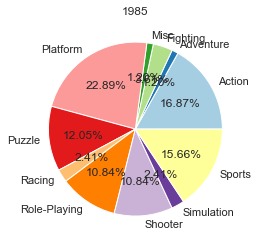

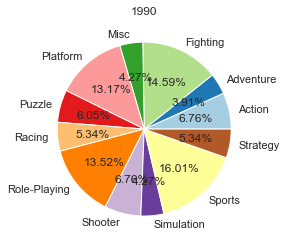

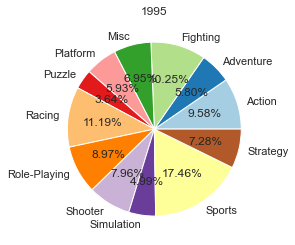

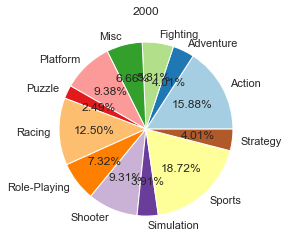

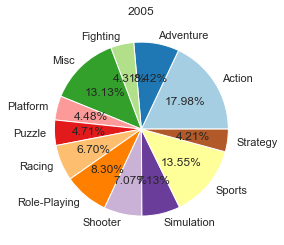

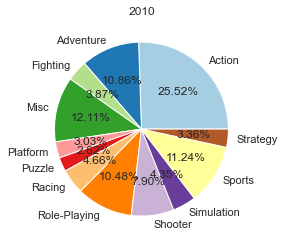

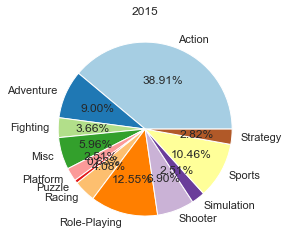

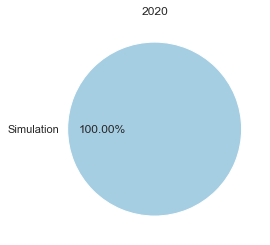

In [60]:
# 5년 주기 발매 트렌드는?
for i in np.sort(df['5_years'].unique()):
    dt = Genre_var[Genre_var['5_years']==i]
    plt.pie(dt['Count'], labels=dt['Genre'], autopct='%.2f%%')
    plt.title(i)
    plt.show()

#### 고객들이 구매하는 게임의 장르도 트렌드가 연도마다 달라지며, 게임사가 발매하는 게임 장르와 고객이 소비하는 게임장르의 트렌드에는 약간의 차이가 존재
#### 5년주기를 확인했을 때에도 고객들이 구매하는 게임의 장르와, 게임사가 발매하는 게임장르의 트렌드가 조금씩 달라지며
#### 게임 회사는 트렌드와 관계없이 action, sports 장르의 출시 비율이 높은편이고, 고객들의 경우에도 action, sports의 비중이 높은편이나, 장르변화가 있는것을 봐서는 트렌드 변화가 있다고 봐야할 것 같다.

In [108]:
Genre_var_cs = df.groupby(['Year','Genre'],as_index=False).sum()
Genre_var_cs['Western'] = Genre_var_cs[['NA_Sales','EU_Sales']].sum(axis=1)
Genre_var_cs['Non_Western'] = Genre_var_cs[['JP_Sales','Other_Sales']].sum(axis=1)
Genre_var_cs['Total'] = Genre_var_cs[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

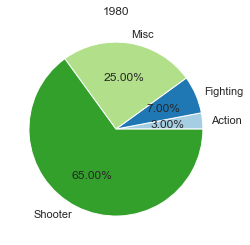

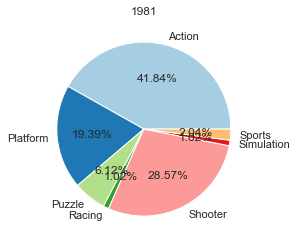

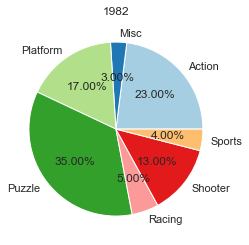

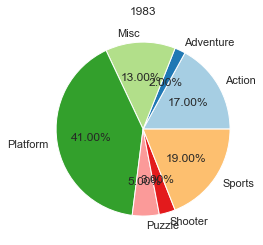

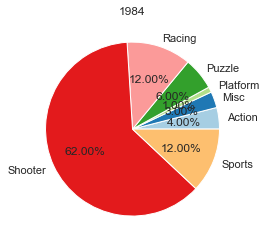

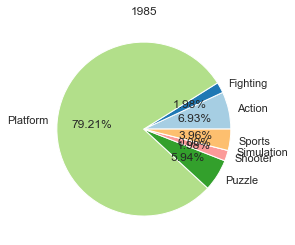

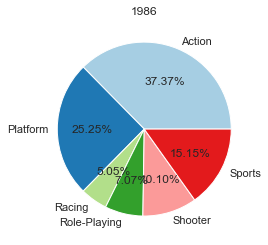

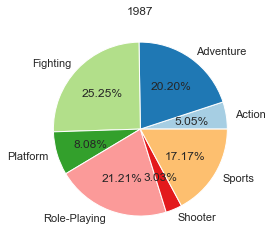

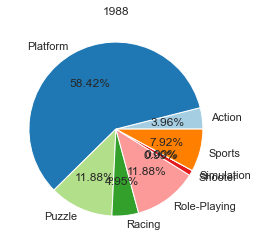

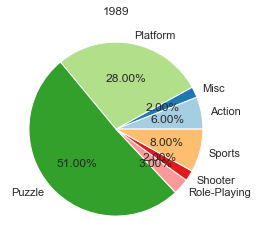

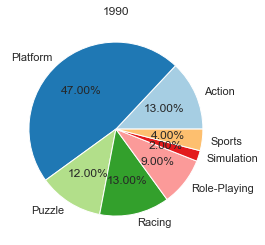

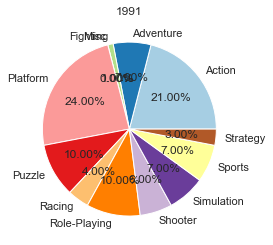

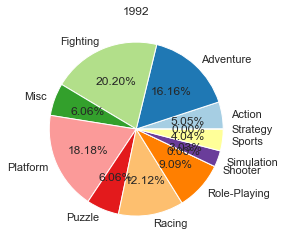

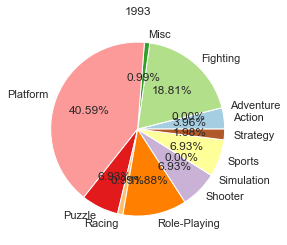

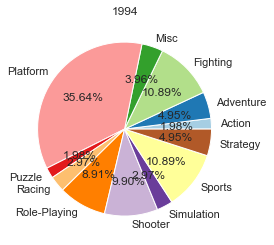

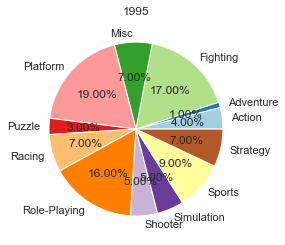

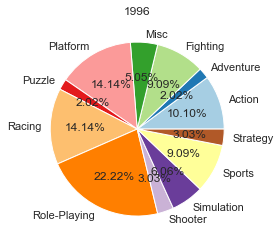

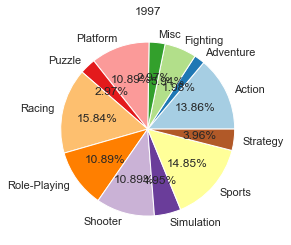

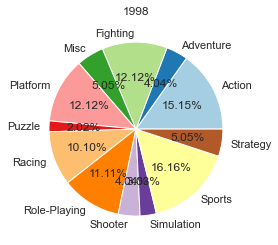

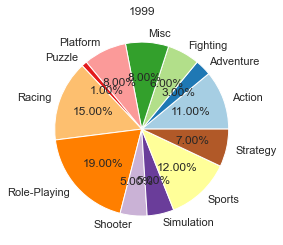

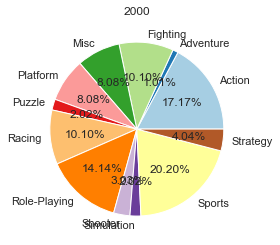

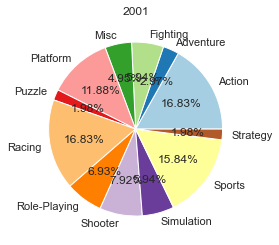

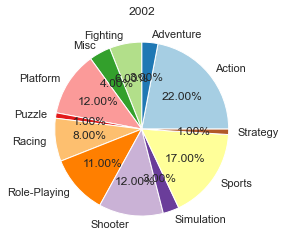

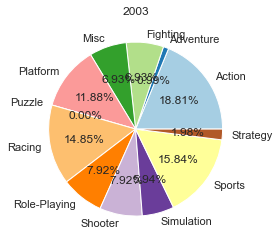

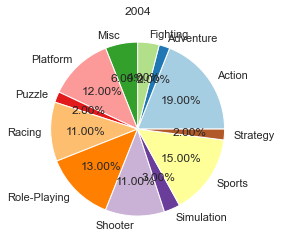

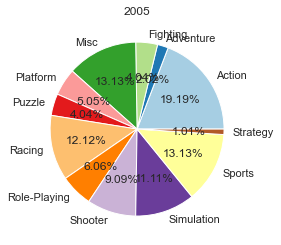

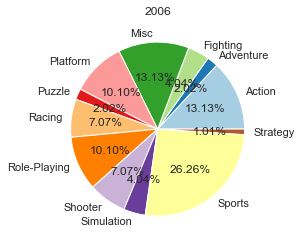

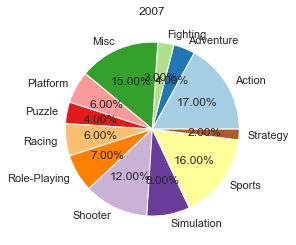

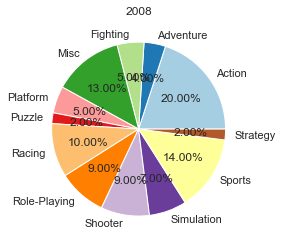

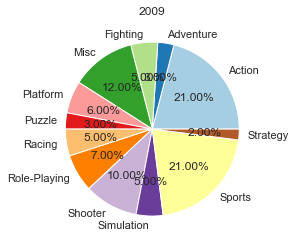

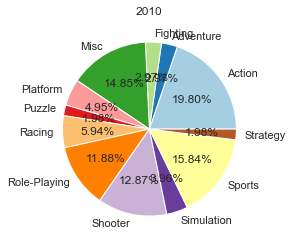

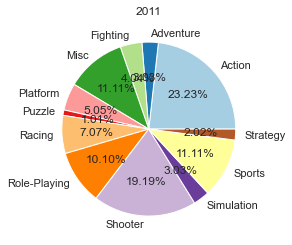

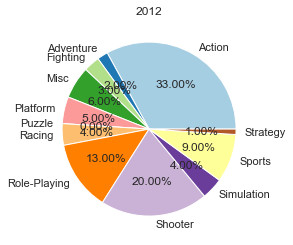

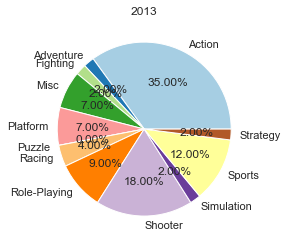

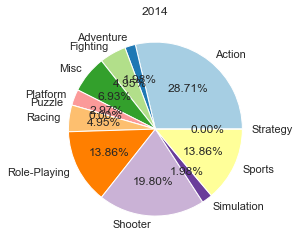

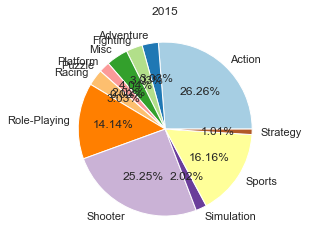

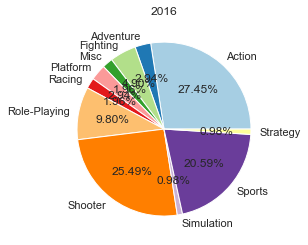

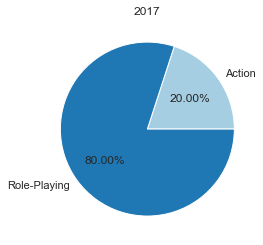

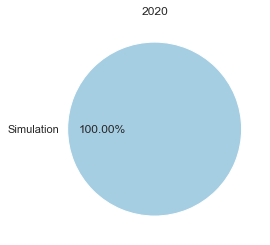

In [63]:
for i in set(df['Year']):
    dt = Genre_var_cs[Genre_var_cs['Year']==i]
    ratio = round(dt['Total']/dt['Total'].sum(),2)
    plt.pie(ratio, labels=dt['Genre'], autopct='%.2f%%')
    plt.title(i)
    plt.show()
# ratio = round(Genre_var_cs[Genre_var_cs['Year']==1980]['Total']/Genre_var_cs[Genre_var_cs['Year']==1980]['Total'].sum(),2)

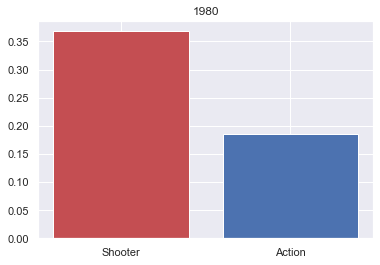

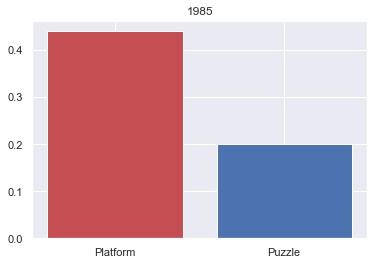

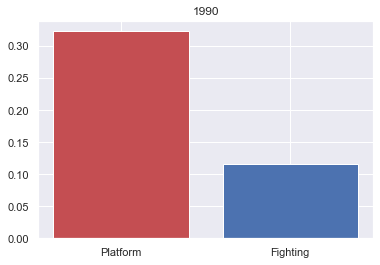

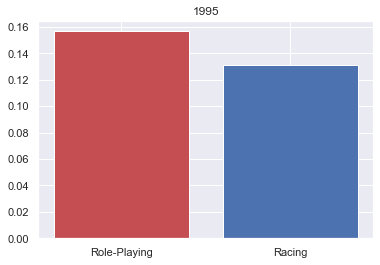

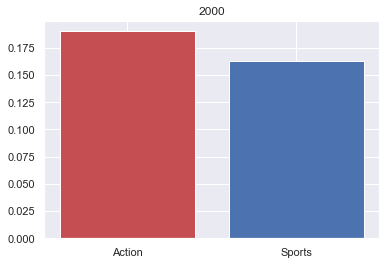

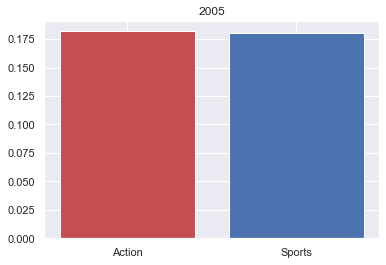

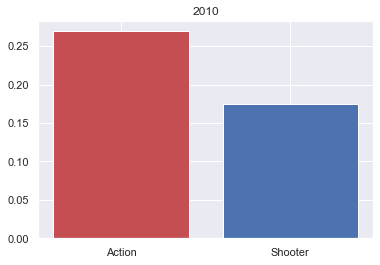

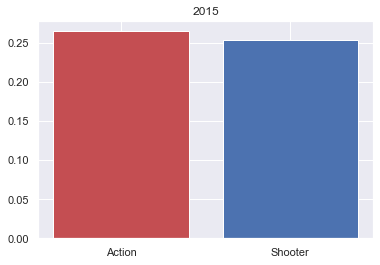

In [64]:
# 5년 주기 판매 기준 장르 트렌드는? Top2
Genre_var_cs = df.groupby(['5_years','Genre'],as_index=False).sum()
Genre_var_cs['Western'] = Genre_var_cs[['NA_Sales','EU_Sales']].sum(axis=1)
Genre_var_cs['Non_Western'] = Genre_var_cs[['JP_Sales','Other_Sales']].sum(axis=1)
Genre_var_cs['Total'] = Genre_var_cs[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
for i in np.sort(df['5_years'].unique()[:-1]):
    dt = Genre_var_cs[Genre_var_cs['5_years']==i]
    ratio = dt['Total']/dt['Total'].sum()
    top2 = ratio.sort_values(ascending=False)[:2]
#     plt.pie(top2, labels=dt['Genre'][top2.index], autopct='%.2f%%')
    plt.bar(dt['Genre'][top2.index],top2, color = ['r','b'] )
    plt.xticks(np.arange(2), dt['Genre'][top2.index])
    plt.title(i)
    plt.show()

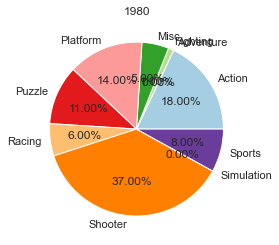

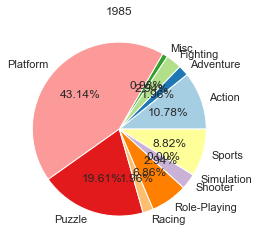

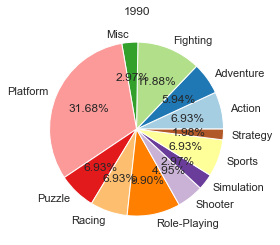

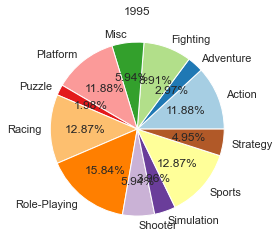

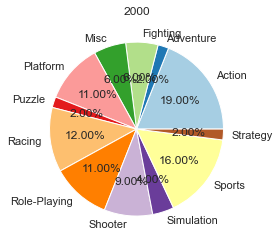

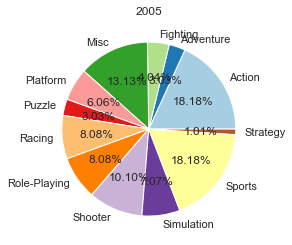

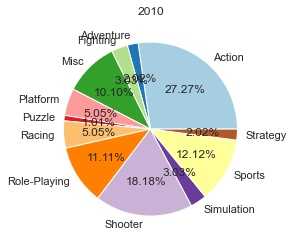

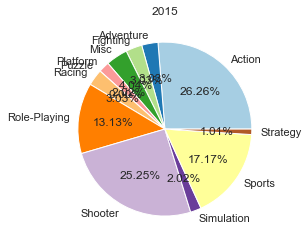

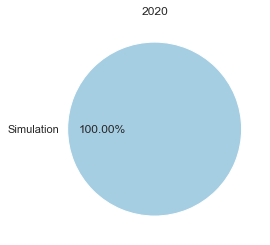

In [65]:
# 5년 주기 판매 기준 장르 트렌드는?
Genre_var_cs = df.groupby(['5_years','Genre'],as_index=False).sum()
Genre_var_cs['Western'] = Genre_var_cs[['NA_Sales','EU_Sales']].sum(axis=1)
Genre_var_cs['Non_Western'] = Genre_var_cs[['JP_Sales','Other_Sales']].sum(axis=1)
Genre_var_cs['Total'] = Genre_var_cs[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
for i in np.sort(df['5_years'].unique()):
    dt = Genre_var_cs[Genre_var_cs['5_years']==i]
    ratio = round(dt['Total']/dt['Total'].sum(),2)
    plt.pie(ratio, labels=dt['Genre'], autopct='%.2f%%')
    plt.title(i)
    plt.show()

3.`인기가 많은 게임에 대한 분석 및 시각화 프로세스`가 포함되어야 합니다.
- **인기가 많다는 것을 어떻게 정의했나요?**  
    전체 판매량, 동일 게임의 다양한 플랫폼 출시, 업데이트 버전의 게임(ex. 포켓몬 실버, 골드, 다이아..)
- **해당 게임이 왜 인기가 많다고 생각했나요?**  
    인기가 많다는 것은 그만큼 해당 게임을 플레이하는 사람들이 많다는 것을 의미하기 때문에, 이것은 게임 판매량으로 이어지게 된다.
    게임 판매량을 확인했을 때, 해당 게임의 판매량이 많았기 때문에 인기가 많다고 생각했다.
    인기가 많은 게임은 회사 측에서 추가 수익을 창출하기 위해서 다양한 플랫폼으로 게임을 재출시하거나, 
    새로운 버전 또는 리뉴얼 버전의 게임 출시를 주로 시도한다. 
    따라서 동일한 게임이 다양한 플랫폼 또는 새로운 버전의 게임이 출시되는 것을 보고 인기가 많다고 판단하였다.
- **시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?**  
- **해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?**  

In [66]:
# 가장 우선적으로 고려할 사항은 판매량이다. 인기가 많다는 것은 그만큼 해당 게임을 플레이하기 위해 구매하는 사람이 많다는 것을 의미하기 때문이다.
pop = df.groupby('Name',as_index=False).sum().sort_values(by='Total',ascending=False)[['Name','Total']]

In [67]:
# 전세계 판매량을 분위수로 표현하면 대부분은 판매량이 1M을 넘지 못한다는 것을 알 수 있다.
pop.describe()

Total
count  11295.000000
mean       0.775154
std        2.242044
min        0.010000
25%        0.060000
50%        0.190000
75%        0.610000
max       82.740000

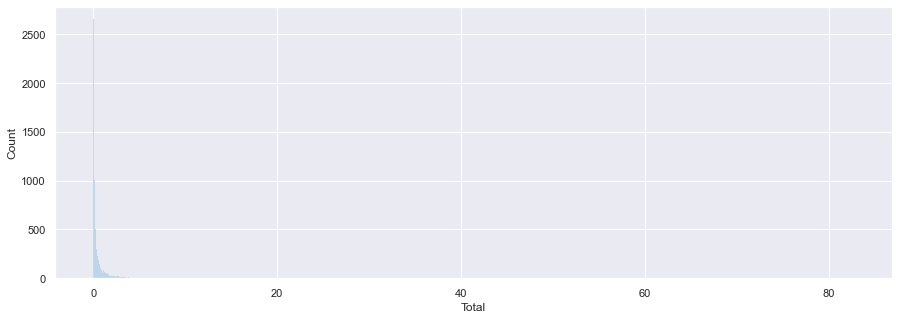

In [68]:
plt.figure(figsize=(15,5))
sns.histplot(x= pop['Total'])
plt.show()

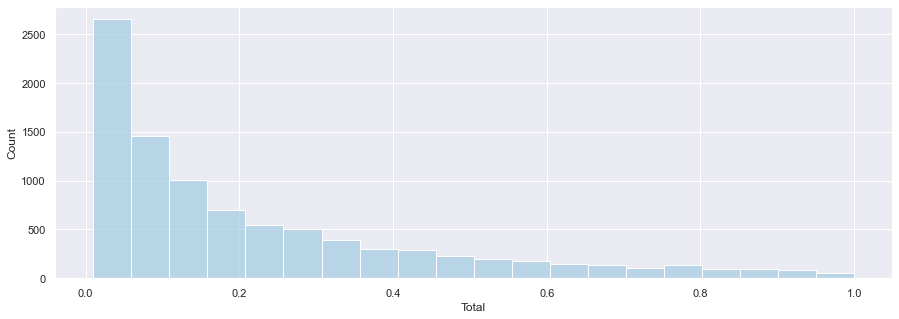

In [69]:
plt.figure(figsize=(15,5))
sns.histplot(pop.query('Total<1')['Total'],bins=20)
plt.show()

In [70]:
'''
인기가 많다는 것은 판단하는 기준에 따라 달라질 수 있기 때문에 개인이 판단할 수 없는 문제이지만,
판매량을 기준으로 상위 10%, 5%, 1%로 표현해보면 다음과 같다.
'''
print('판매량 상위 10% : {}M'.format(round(pop['Total'].quantile(q=0.90),2)))
print('판매량 상위 5% : {}M'.format(round(pop['Total'].quantile(q=0.95),2)))
print('판매량 상위 1% : {}M'.format(round(pop['Total'].quantile(q=0.99),2)))
print('판매량 1위 : {}M'.format(round(pop['Total'].max(),2)))

판매량 상위 10% : 1.76M
판매량 상위 5% : 3.15M
판매량 상위 1% : 8.78M
판매량 1위 : 82.74M


In [109]:
'''
각 장르를 살펴봤을 때, 비슷한 게임 또는 동일한 리뉴얼, 업데이트된 버전의 게임이 상위권을 차지한 것을 알 수 있다.
'''
pop.head(20)

Name  Total
10820                      Wii Sports  82.74
3641               Grand Theft Auto V  55.92
9180                Super Mario Bros.  45.31
9560                           Tetris  35.84
5482                   Mario Kart Wii  35.83
10822               Wii Sports Resort  33.00
7230         Pokemon Red/Pokemon Blue  31.38
1204   Call of Duty: Modern Warfare 3  30.84
6617            New Super Mario Bros.  30.01
1200       Call of Duty: Black Ops II  29.73
1198          Call of Duty: Black Ops  29.41
10818                        Wii Play  29.01
6620        New Super Mario Bros. Wii  28.61
2534                        Duck Hunt  28.31
1202             Call of Duty: Ghosts  27.37
9194                Super Mario World  26.09
1199        Call of Duty: Black Ops 3  25.30
1203   Call of Duty: Modern Warfare 2  25.10
6683                       Nintendogs  24.75
3645    Grand Theft Auto: San Andreas  23.86

### 장르별 Top-20

In [73]:
pop1 = df.groupby(['Name','Genre'],as_index=False).sum().sort_values(by='Total',ascending=False)[['Name','Genre','Total']]

In [75]:
pop1[pop1['Genre']=='Sports'][:20].reset_index(drop=True)

Name   Genre  Total
0                                  Wii Sports  Sports  82.74
1                           Wii Sports Resort  Sports  33.00
2                                     Wii Fit  Sports  22.72
3                                Wii Fit Plus  Sports  22.00
4                                     FIFA 15  Sports  19.02
5                                     FIFA 14  Sports  17.16
6                                     FIFA 16  Sports  16.43
7          Mario & Sonic at the Olympic Games  Sports  13.19
8                                     FIFA 12  Sports  13.14
9                              FIFA Soccer 11  Sports  12.55
10                             FIFA Soccer 10  Sports  10.73
11                              Zumba Fitness  Sports   9.79
12                             FIFA Soccer 08  Sports   9.50
13                              Madden NFL 07  Sports   9.22
14                             FIFA Soccer 09  Sports   8.66
15                  Pro Evolution Soccer 2008  Sports   8.47
16                     Tony Hawk's Pro Skater  Sports   8.47
17                              Madden NFL 06  Sports   8.44
18                              Madden NFL 08  Sports   8.16
19  Mario & Sonic at the Olympic Winter Games  Sports   8.11

In [76]:
pop1[pop1['Genre']=='Action'][:20].reset_index(drop=True)

Name   Genre  Total
0                            Grand Theft Auto V  Action  55.92
1                 Grand Theft Auto: San Andreas  Action  23.86
2                           Grand Theft Auto IV  Action  21.61
3                   Grand Theft Auto: Vice City  Action  16.19
4                                FIFA Soccer 13  Action  16.15
5             LEGO Star Wars: The Complete Saga  Action  15.73
6               Assassin's Creed IV: Black Flag  Action  13.20
7                          Grand Theft Auto III  Action  13.11
8                          Assassin's Creed III  Action  13.10
9                           Red Dead Redemption  Action  12.93
10         Pokemon HeartGold/Pokemon SoulSilver  Action  11.90
11         The Legend of Zelda: Ocarina of Time  Action  11.82
12                          Assassin's Creed II  Action  11.39
13       Grand Theft Auto: Liberty City Stories  Action  11.25
14                          Batman: Arkham City  Action  11.18
15                               The Last of Us  Action  10.52
16               Star Wars: The Force Unleashed  Action  10.21
17                     LEGO Marvel Super Heroes  Action   9.86
18  LEGO Indiana Jones: The Original Adventures  Action   9.69
19                                   Watch Dogs  Action   9.50

In [77]:
pop1[pop1['Genre']=='Platform'][:20].reset_index(drop=True)

Name     Genre  Total
0                        Super Mario Bros.  Platform  45.31
1                    New Super Mario Bros.  Platform  30.01
2                New Super Mario Bros. Wii  Platform  28.61
3                        Super Mario World  Platform  26.09
4                      Super Mario Bros. 3  Platform  22.49
5                           Super Mario 64  Platform  22.32
6                         Super Mario Land  Platform  18.14
7                      Donkey Kong Country  Platform  13.53
8                       Super Mario Galaxy  Platform  11.52
9                      Super Mario 3D Land  Platform  10.79
10                   Super Mario All-Stars  Platform  10.55
11                 New Super Mario Bros. 2  Platform   9.83
12                         LittleBigPlanet  Platform   8.50
13             Donkey Kong Country Returns  Platform   8.46
14                    Super Mario Galaxy 2  Platform   7.70
15  Crash Bandicoot 2: Cortex Strikes Back  Platform   7.57
16                     Super Mario Bros. 2  Platform   7.46
17    Crash Bandicoot: The Wrath of Cortex  Platform   7.25
18               Crash Bandicoot 3: Warped  Platform   7.13
19     Super Mario World 2: Yoshi's Island  Platform   7.02

In [78]:
pop1[pop1['Genre']=='Puzzle'][:20].reset_index(drop=True)

Name   Genre  Total
0                                        Tetris  Puzzle  35.84
1   Brain Age 2: More Training in Minutes a Day  Puzzle  15.30
2                                     Dr. Mario  Puzzle  10.18
3                                       Pac-Man  Puzzle   9.03
4      Professor Layton and the Curious Village  Puzzle   5.25
5                                 Tetris Worlds  Puzzle   4.01
6       Professor Layton and the Diabolical Box  Puzzle   3.99
7       Professor Layton and the Unwound Future  Puzzle   3.36
8                            Pac-Man Collection  Puzzle   2.94
9                       WarioWare: Smooth Moves  Puzzle   2.92
10                               Yoshi's Cookie  Puzzle   2.80
11        Professor Layton and the Last Specter  Puzzle   2.79
12     Mario vs. Donkey Kong: Mini-Land Mayhem!  Puzzle   2.68
13                                        Yoshi  Puzzle   2.48
14                                  Tetris Plus  Puzzle   2.41
15                           WarioWare Touched!  Puzzle   2.31
16                     Hasbro Family Game Night  Puzzle   2.23
17                                Scribblenauts  Puzzle   2.23
18         High School Musical: Makin' the Cut!  Puzzle   2.20
19                                    Tetris DS  Puzzle   2.14

### Platform 수가 판매량과 상관 관계가 있는가?

In [103]:
cor = df.groupby('Name',as_index=False).count()
cor['Total'] = df.groupby('Name',as_index=False).sum()['Total']
cor = cor[['Platform','Total']]

In [104]:
cor.corr()

Platform     Total
Platform  1.000000  0.328778
Total     0.328778  1.000000

4.`다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론`이 제시되어야 합니다.

더불어 유의미한 인사이트를 도출하기 위해서는
- `다음 분기`가 언제인지
- `회사의 규모`는 어느정도인지
와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.  


1. 비디오 게임 산업의 주요 플랫폼은 닌텐도와 PlayStation 양강 구도로 이루어져있음.
2. wii sports가 전세계적으로 히트를 치면서 PlayStation이 열세로 보이긴하지만, 접근성이 좋은 닌텐도 그리고 매니아 층이 두터운 PlayStation의 경쟁 구도는 계속될 것으로 보임.
3. 2000년부터 2020년까지 장르 선호도 1위는 Action이었기 때문에 세계 시장을 목표로한다면 다음 분기인 2025년까지 Action 게임을 개발하는 것이 바람직해 보임.
4. 다만 일본과 같이 지역 시장에 집중한다면 RolePlaying 처럼 지역 특성에 맞는 게임 개발에 투자하는 것이 좋을 것 같습니다.
5. 게임 시장은 매년마다 트렌드가 바뀌기 때문에 시장 흐름을 빠르게 캐치하는 것이 필요합니다.
6. 하지만 회사의 규모가 작은 중소 기업이라면, 닌텐도와 PlayStation이라는 거대 장벽이 존재하는       비디오 게임 산업에 주력하는 것 보다는 급성장하는 모바일 게임 시장에 먼저 진출해서 자본을 불리고 경쟁력을 높이는 것이 추후 비디오 게임 시장 도전에도 긍정적인 영향으로 작용할 것 같음.